## Logistic Regression Case Study on -

## Lead Scoring

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

                  
                                
                               Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [2]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

## STEP I : IMPORTING DATASET

In [3]:
# Importing lead dataset
lead_data = pd.read_csv("C:/Users/GHAR/Desktop/Lead Scoring Case Study/Lead Scoring Assignment/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## STEP II : UNDERSTANDING DATASET

In [4]:
# SHAPE OF DATA : Total 9240 Data Points with 37 Columns
lead_data.shape

(9240, 37)

In [5]:
# Inspecting Data set for NULL Values
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Null values are there in the dataframe

In [6]:
# Checking the Null values 
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Null values to be handled in the next step of Data Cleaning

In [7]:
# The scale of various columns are in different scale. The same needs to be handled during standardisation step.
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check for duplicate rows : No duplicate rows found
print(lead_data.duplicated().sum())

0


In [9]:
# checking unique values in each column
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Step III : DATA CLEANING

#### STEP 3.1 HANDLING SELECT VALUES AS MENTIONED IN THE PROBLEM
As mentioned in the Problem Statement, many of the categorical variables have a level called'Select'which needs to be handled
because it is as good as a null value. One of the reason might be is that the customer did not select any option from the list
and hence for such columns the data remained as default 'Select' for Select. 

In [10]:
# Identifying columns having 'Select' as one of the levels

cols_with_select_value = [col for col in lead_data.columns if len(lead_data[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [11]:
# Converting 'Select' value to NaN value.
lead_data = lead_data.replace('Select', np.nan)

In [12]:
# Checking again if all 'Select' values have been handled
cols_with_select_value = [col for col in lead_data.columns if len(lead_data[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


#### STEP 3.2 : HANDLING MISSING VALUES

In [13]:
# Calculating Missing Values Percentage

100*(lead_data.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [14]:
missing_perc = 100*(lead_data.isna().mean()).sort_values(ascending=False) # converted to dataframe missing_perc
missing_perc

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [15]:
col_to_drop = missing_perc[missing_perc>=40].index.to_list() # Columns identified with misssing value percentage greater than 40%
col_to_drop

['How did you hear about X Education',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Score',
 'Asymmetrique Activity Score',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [16]:
# dropping the columns with missing values greater than or equal to 40%
lead_data=lead_data.drop(columns=col_to_drop)

In [17]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

##### Now analyzing remaining columns which have missing values below 40%

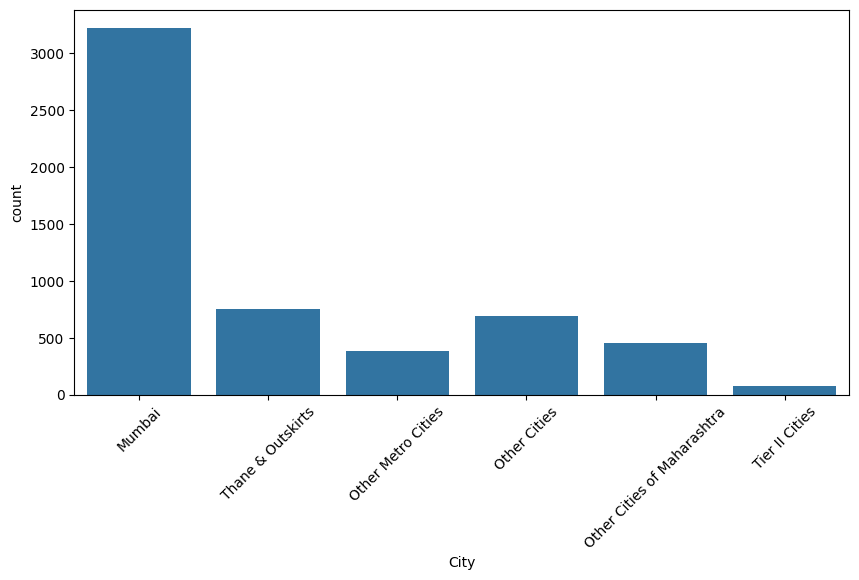

In [18]:
# Starting in descending order with City being the first column
plt.figure(figsize=(10,5))
sns.countplot(data=lead_data,x='City',orient='v')
plt.xticks(rotation=45)
plt.show()

In [19]:
lead_data['City'].value_counts(normalize=True) *100
# Therefore Mumbai is the highest in frequency.

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: proportion, dtype: float64

In [20]:
# The column is skewed with value 'Mumbai'. Further Imputing missing values with 'Mumbai' will increase skewness.
# Hence we will drop the city column
lead_data['City']=lead_data['City'].replace(np.nan,'Missing')

In [21]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)
# Hence City columns handled successfully.

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.0000

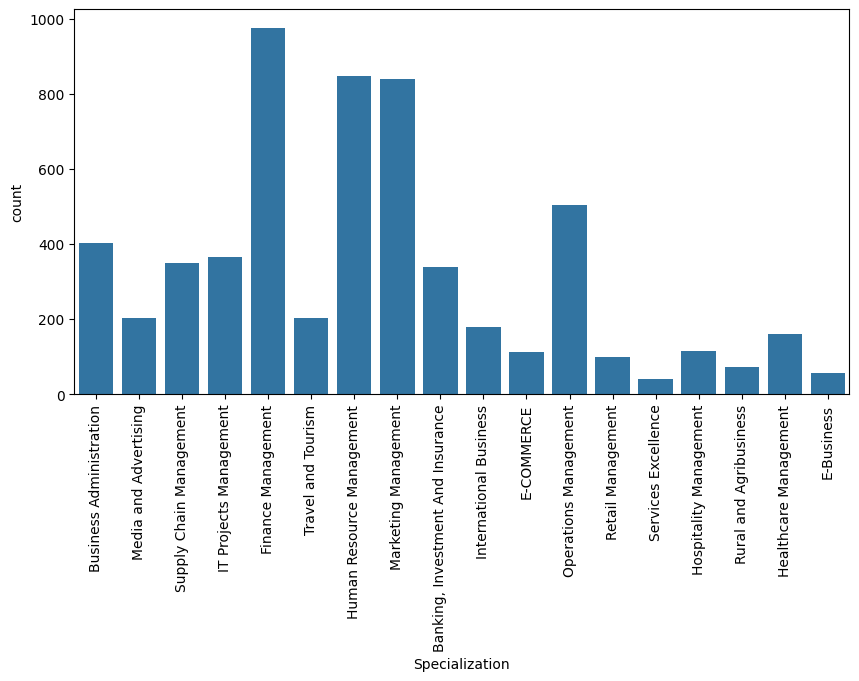

In [22]:
# Now handling Column Specialization
plt.figure(figsize=(10,5))
sns.countplot(data=lead_data,x='Specialization',orient='v')
plt.xticks(rotation=90)
plt.show()

In [23]:
lead_data['Specialization'].value_counts(normalize=True) *100

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: proportion, dtype: float64

In [24]:
# Approx 36.5% of leads have left this column blank which may be due to the fact that they don't hold any specialization.
# Hence instead of imputing it will be better to create a new category as 'Others' because imputing will increase skewness in column.
lead_data['Specialization']=lead_data['Specialization'].replace(np.nan,'Others')

In [25]:
lead_data.Specialization.value_counts() # successfully included new category

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [26]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

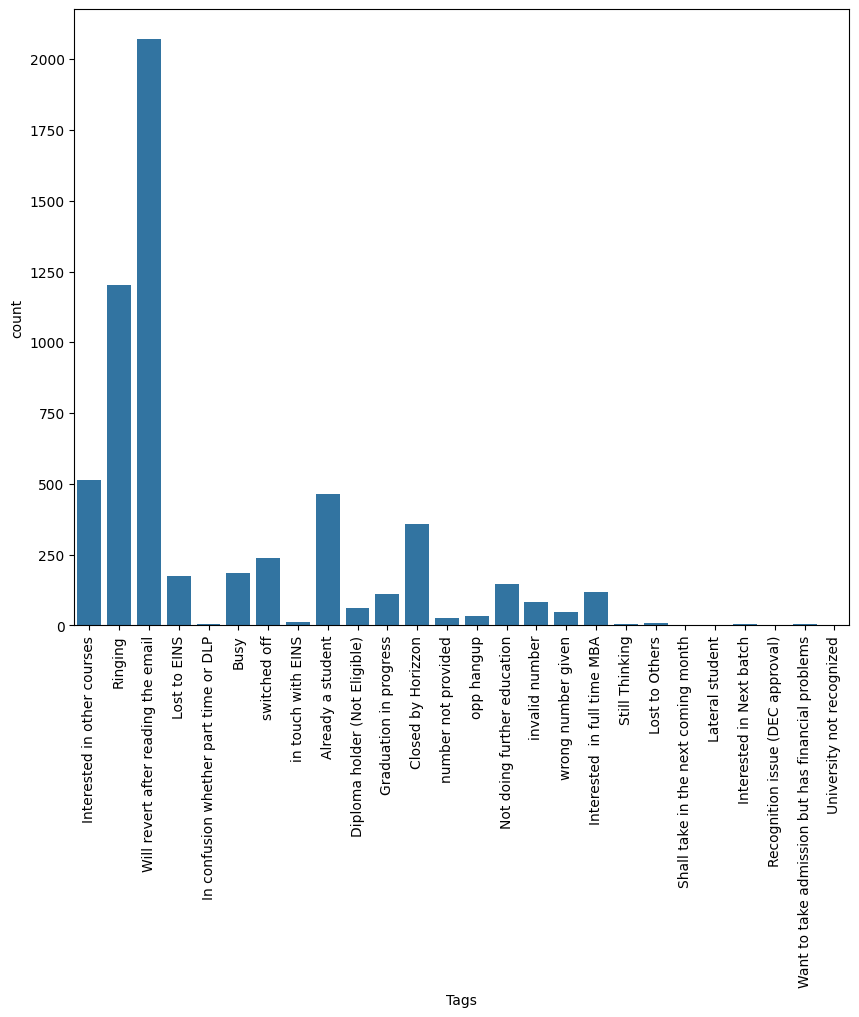

In [27]:
# Now handling TAGs columns
plt.figure(figsize=(10,8))
sns.countplot(data=lead_data,x='Tags',orient='v')
plt.xticks(rotation=90)
plt.show()

In [28]:
lead_data['Tags'].value_counts(normalize=True)*100

Tags
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                               

In [29]:
# Since highest frequency is of 'Will revert after reading the email' ,however if we impute missing values modw it will increase skewness.
# Hence creating new catregory as 'Missing
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Missing')

In [30]:
lead_data['Tags'].value_counts() # successfully imputed the value

Tags
Missing                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [31]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                              0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
City                                              0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.0000

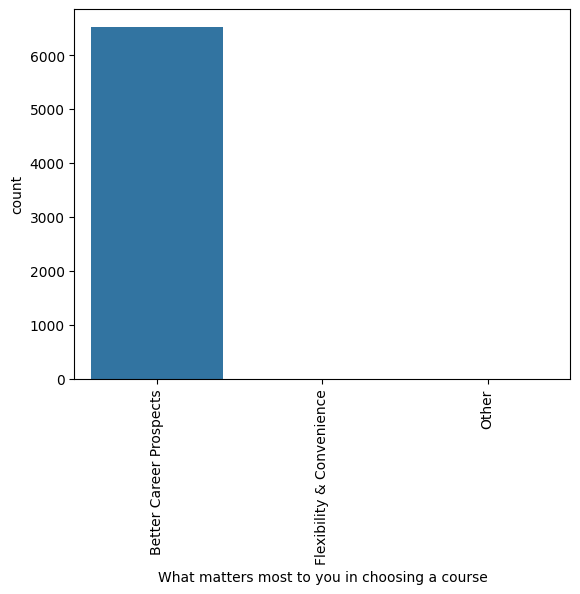

In [32]:
# Now analyzing column 'What matters most to you in choosing a course' which has 29& missing value
sns.countplot(data=lead_data,x='What matters most to you in choosing a course',orient='v')
plt.xticks(rotation=90)
plt.show()

In [33]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [34]:
# since 'Better Career Prospects' is the dominant option with others options to almost zero. Hence the data is highly skewed so better is to remove the column.
# The column is not providing any variance due to high skewness
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

In [35]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

What is your current occupation             29.112554
Country                                     26.634199
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Tags                                         0.000000
Update me on Supply Chain Content            0.000000
Newspaper                                    0.000000
Get updates on DM Content                    0.000000
City                                         0.000000
I agree to pay the amount through cheque     0.000000
A free copy of Mastering The Interview       0.000000
Digital Advertisement                        0.000000
Search                                       0.000000
X Education Forums          

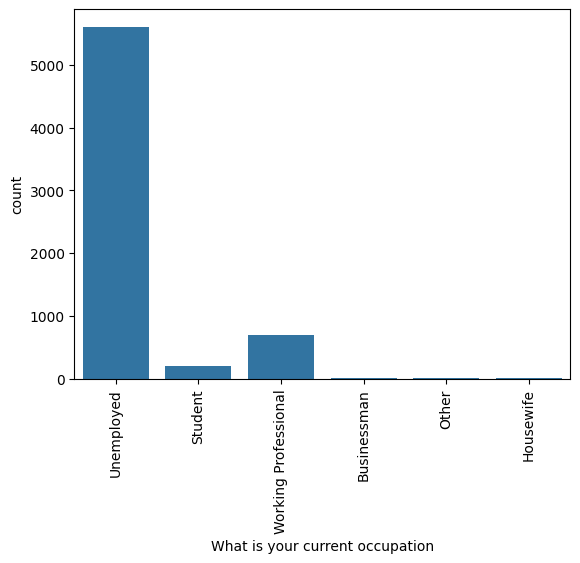

In [36]:
# Now handling 'What is your current occupation' 
sns.countplot(data=lead_data,x='What is your current occupation',orient='v')
plt.xticks(rotation=90)
plt.show()

In [37]:
lead_data['What is your current occupation'].value_counts(normalize=True)*100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: proportion, dtype: float64

In [38]:
# We see that Umenployed has the highest number however the same can't be considered skewed since the needy leads are those who are unemployed.
# Hence, this column is important from business context. So let's impute the null values with umemployed
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [39]:
lead_data['What is your current occupation'].value_counts() # successfully imputed

What is your current occupation
Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [40]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

Country                                     26.634199
TotalVisits                                  1.482684
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Lead Source                                  0.389610
Prospect ID                                  0.000000
Digital Advertisement                        0.000000
Through Recommendations                      0.000000
Receive More Updates About Our Courses       0.000000
Tags                                         0.000000
Update me on Supply Chain Content            0.000000
X Education Forums                           0.000000
Get updates on DM Content                    0.000000
City                                         0.000000
I agree to pay the amount through cheque     0.000000
A free copy of Mastering The Interview       0.000000
Newspaper                                    0.000000
Search                                       0.000000
Newspaper Article           

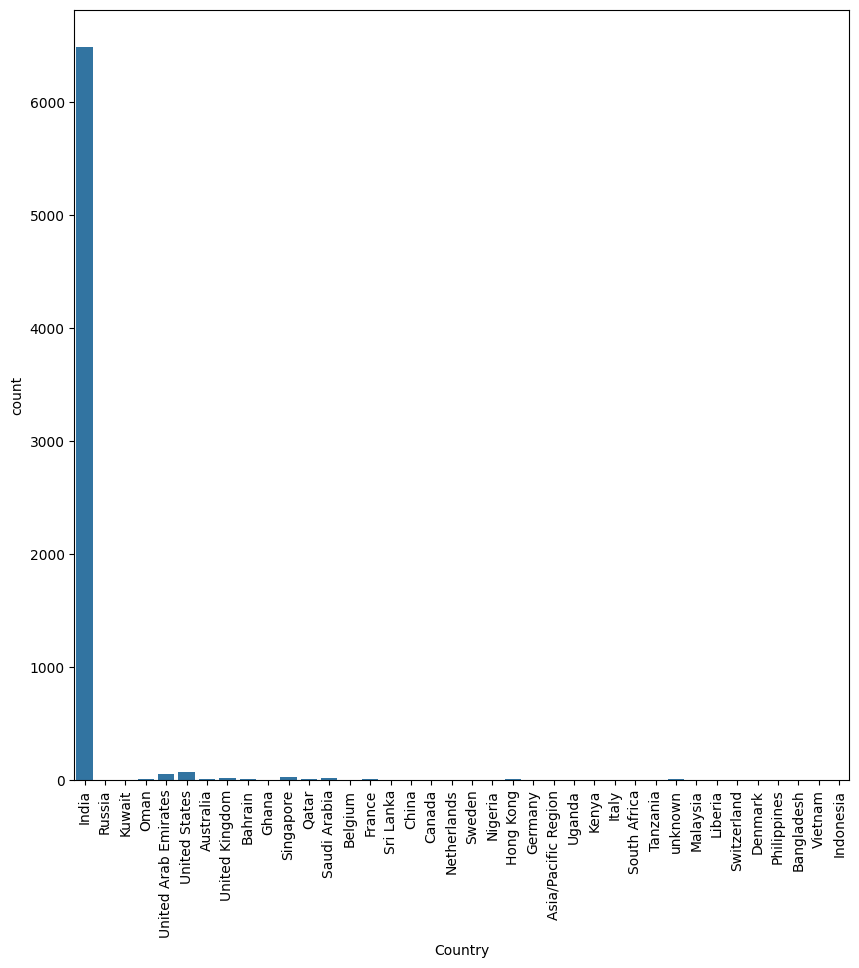

In [41]:
# Handling Country
plt.figure(figsize=(10,10))
sns.countplot(data=lead_data,x='Country',orient='v')
plt.xticks(rotation=90)
plt.show()

In [42]:
# We can see that this is highly skewed column but it is does not seems an useful information on the lead now as almost 96% leads are from country being 'India'.
# Hence we can drop this column.
lead_data=lead_data.drop('Country',axis=1)

In [43]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.

In [44]:
# Handling Total Visits
lead_data['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [45]:
# Imputing with mode
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].mode()[0], inplace=True)

In [46]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.000000
Search                                      0.

In [47]:
# Handling Page Views Per Visit
lead_data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1

In [48]:
# Imputing with MODE
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].mode()[0], inplace=True)

In [49]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
Newspaper Article                           0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
City                                        0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Tags                                        0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
X Education Forums                          0.000000
Magazine                                    0.000000
Lead Number                                 0.000000
Search                                      0.000000
What is your current occupation             0.

In [50]:
# Handling Column Last Activity
lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [51]:
lead_data['Last Activity']=lead_data['Last Activity'].replace(np.nan,'Email Opened')

In [52]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

Lead Source                                 0.38961
Prospect ID                                 0.00000
Newspaper Article                           0.00000
A free copy of Mastering The Interview      0.00000
I agree to pay the amount through cheque    0.00000
City                                        0.00000
Get updates on DM Content                   0.00000
Update me on Supply Chain Content           0.00000
Tags                                        0.00000
Receive More Updates About Our Courses      0.00000
Through Recommendations                     0.00000
Digital Advertisement                       0.00000
Newspaper                                   0.00000
X Education Forums                          0.00000
Magazine                                    0.00000
Lead Number                                 0.00000
Search                                      0.00000
What is your current occupation             0.00000
Specialization                              0.00000
Last Activit

In [53]:
# Handling Column Lead Source
lead_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [54]:
lead_data['Lead Source']=lead_data['Lead Source'].replace(np.nan,'Google')

In [55]:
# Now again checking the status of NULL columns.
((lead_data.isnull().mean())*100).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

#### STEP 3.3 : Handling Columns with Single Unique values

In [56]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.394156,487.698268,2.327787
std,23405.995698,0.486714,4.836682,548.021466,2.164258
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,12.000000,0.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [57]:
lead_data.describe(include = ['category','object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,27,1,1,7,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Missing,No,No,Missing,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,3353,9240,9240,3669,9240,6352,3407


Following columns have only `one unique value`: 
'Magazine'
'Receive More Updates About Our Courses'
'Update me on Supply Chain Content'
'Get updates on DM Content'
'I agree to pay the amount through cheque'

Therefore since there is only one unique value they can be dropped as they do not add any variance to the data

In [58]:
lead_data.drop(['Magazine',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [59]:
lead_data.shape

(9240, 23)

#### STEP 3.4 : Now dropping columns having no relevance to Modelling

'Prospect ID',
'Lead Number',
'Last Notable Activity' 
 

In [60]:
lead_data.drop(['Prospect ID',
'Lead Number',
'Last Notable Activity'], axis = 1, inplace = True)

In [61]:
lead_data.shape

(9240, 20)

In [62]:
lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Tags', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

#### So all the missing values successfully handled

## Checking Overall Rows / DataPoints retained after Data Cleaning

In [63]:
# Percentage of rows retained 
(len(lead_data.index)/9240)*100

100.0

In [64]:
lead_data.shape

(9240, 20)

## 100% data points retained with reduction of SEVENTEEN columns

# STEP 4: Now performing EDA

##### Indentifying Categorical and Numerical Columns

In [65]:
# Select the columns with non-numeric data type
categorical_cols = lead_data.select_dtypes(include=['category', 'object']).columns.tolist()
categorical_cols


['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'City',
 'A free copy of Mastering The Interview']

In [66]:
# Select the columns with non-numeric data type
numerical_cols = lead_data.select_dtypes(include=['int', 'float']).columns.tolist()
numerical_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [67]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

## Univariate Analysis and Bivariate Analysis

### 1) Converted 
#### Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [68]:
sum(lead_data.Converted)/len((lead_data).index)*100

38.53896103896104

Therefore Lead Conversion is 38% Approx

### 2) Lead Origin


([0, 1, 2, 3, 4],
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

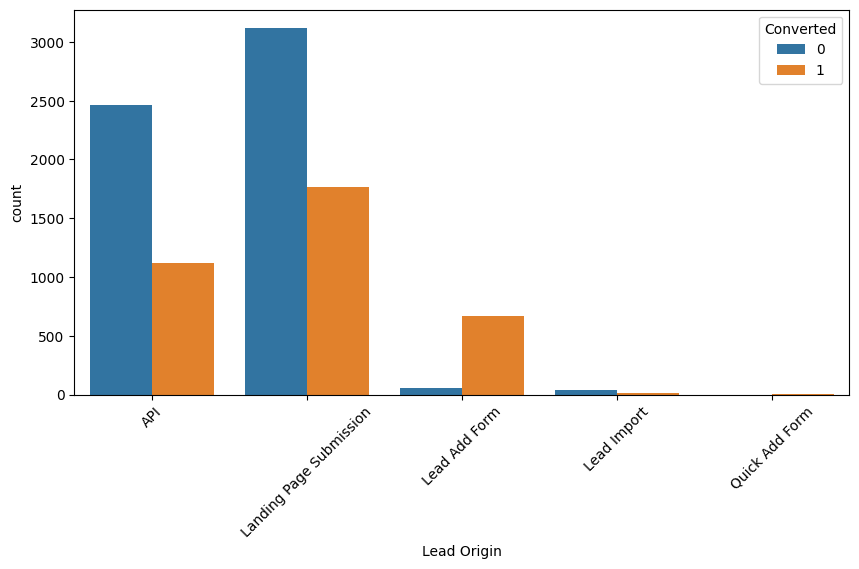

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
plt.xticks(rotation = 45)

### Inference :
1. API and Landing Page Submission have 50% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import and Quick add form are very less in count.

**To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.**

### 3) Lead Source

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

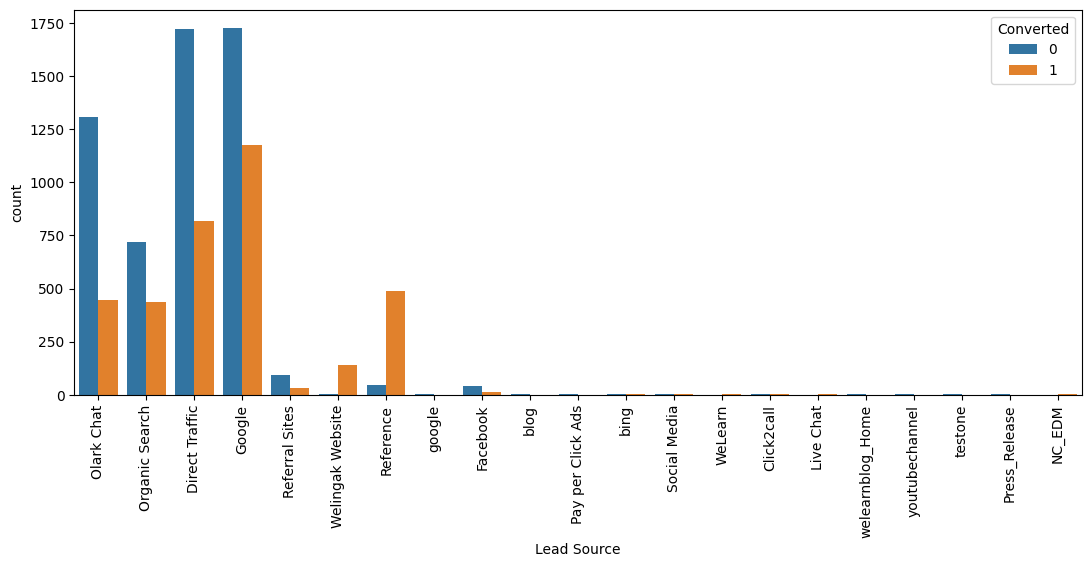

In [70]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)

In [71]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [72]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


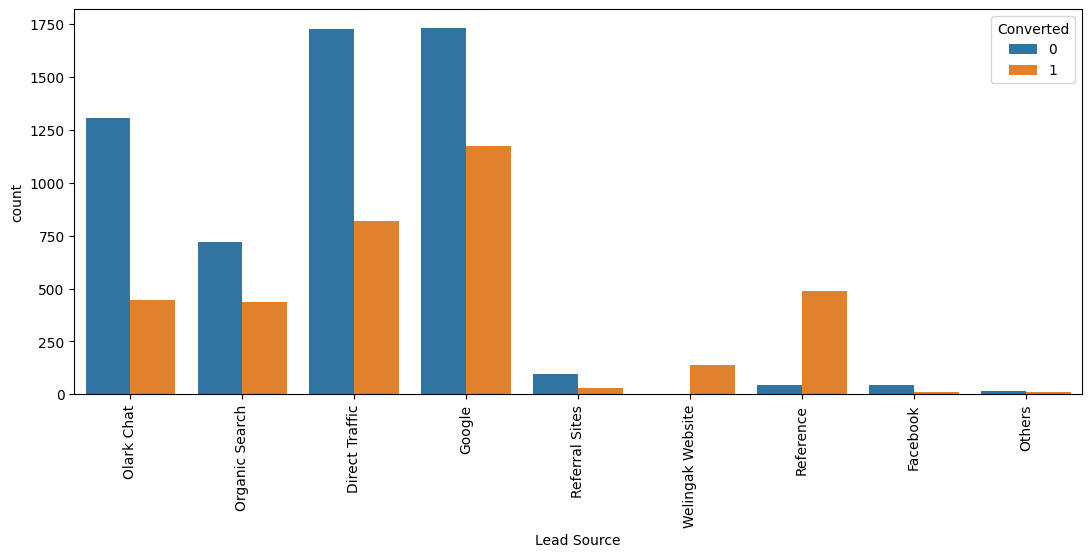

In [73]:
# Visualizing again
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

**To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.**

### 4) Do not Email 

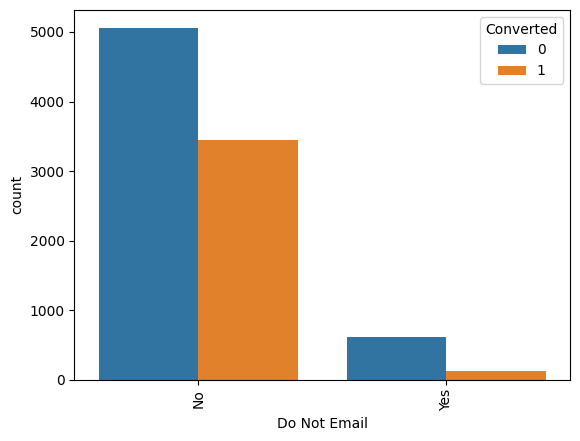

In [74]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 5) Do not call

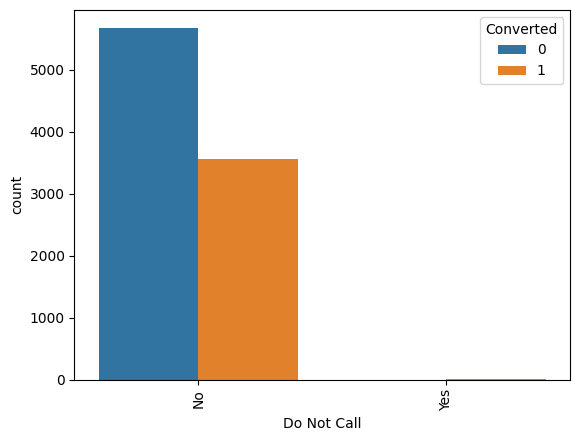

In [75]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 6) TotalVisits

In [76]:
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

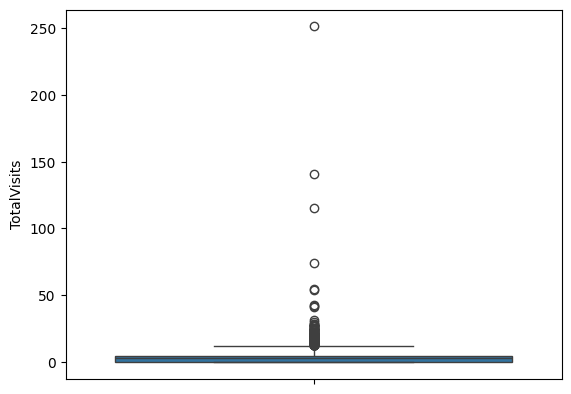

In [77]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

In [78]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: ylabel='TotalVisits'>

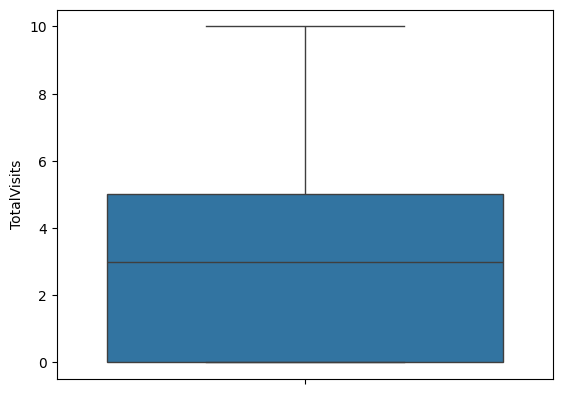

In [79]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

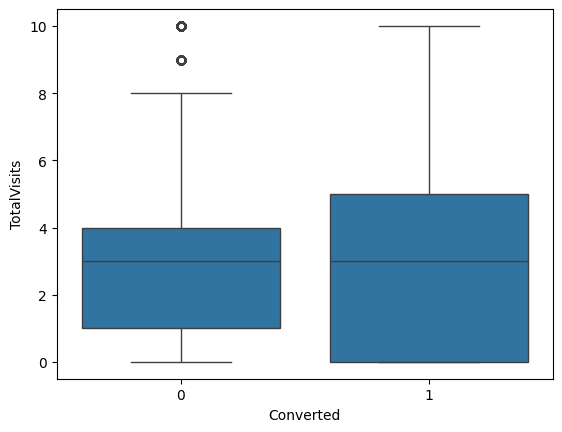

In [80]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)

### Inference
* Median for converted and not converted leads are the same.

Nothing can be concluded on the basis of Total Visits.

### 7) Total Time Spent on Website

In [81]:
lead_data['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

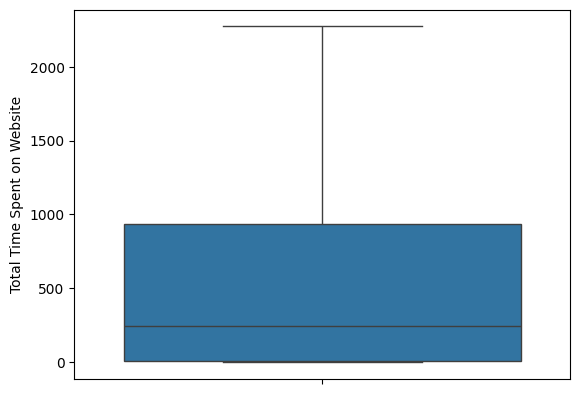

In [82]:
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()

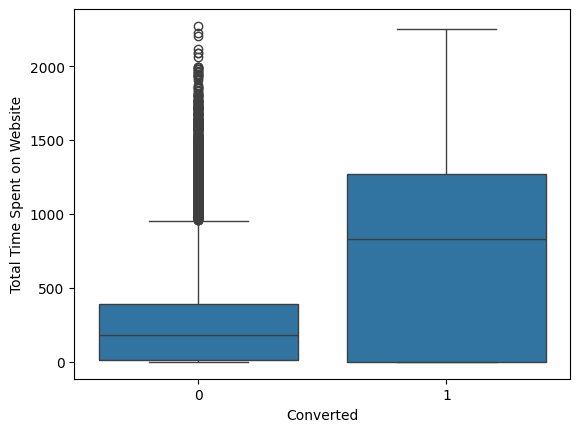

In [83]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

### Inference
* Leads spending more time on the weblise are more likely to be converted.

**Website should be made more engaging to make leads spend more time.**

### 8) Page Views Per Visit

In [84]:
lead_data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

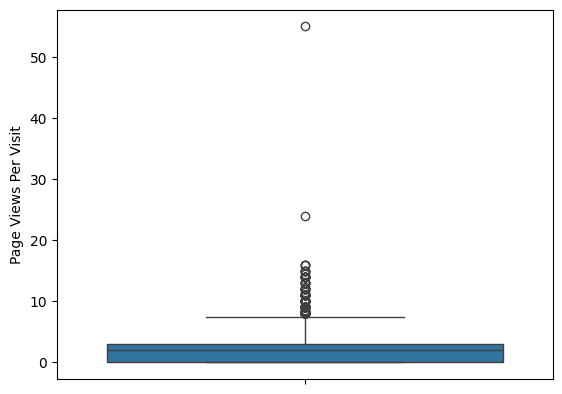

In [85]:
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

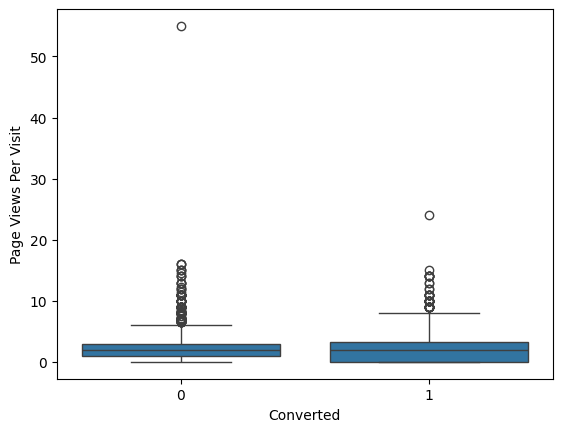

In [86]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data)
plt.show()

### Inference
* Median for converted and unconverted leads is the same.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

### 9) Last Activity

In [87]:
lead_data['Last Activity'].describe()

count             9240
unique              17
top       Email Opened
freq              3540
Name: Last Activity, dtype: object

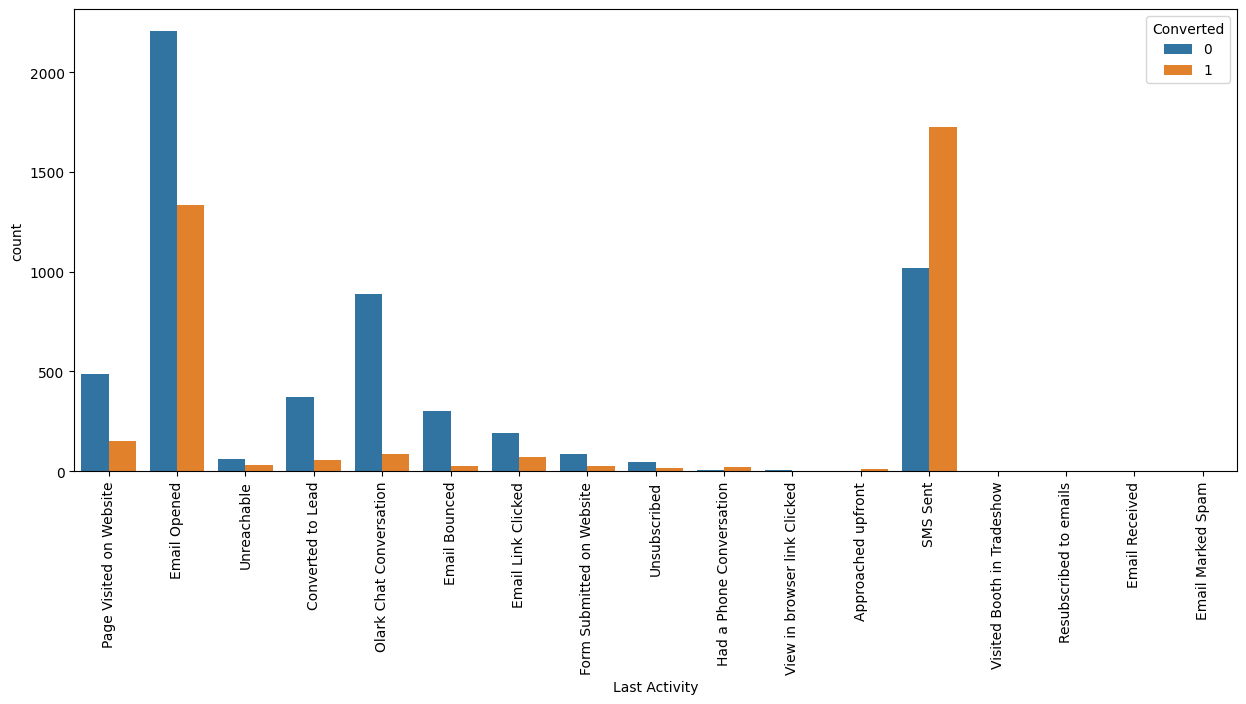

In [88]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data =lead_data)
plt.xticks(rotation = 90)
plt.show()

In [89]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

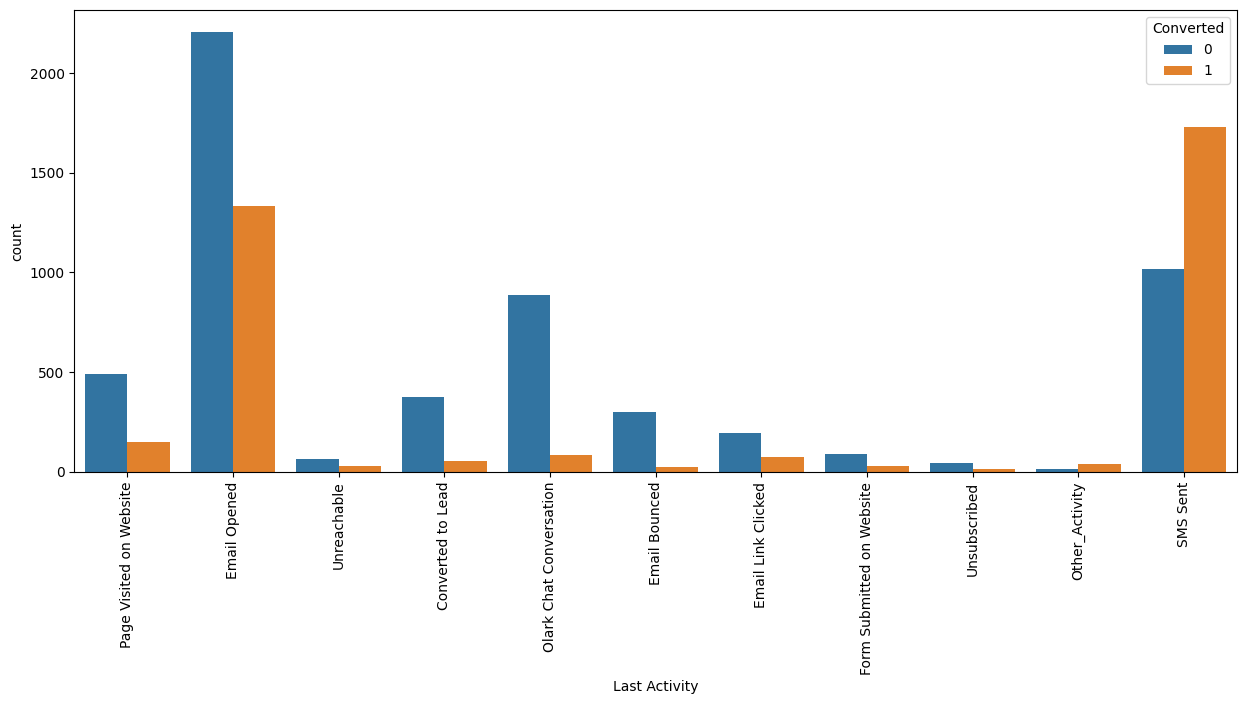

In [90]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.

### 10) Specialization

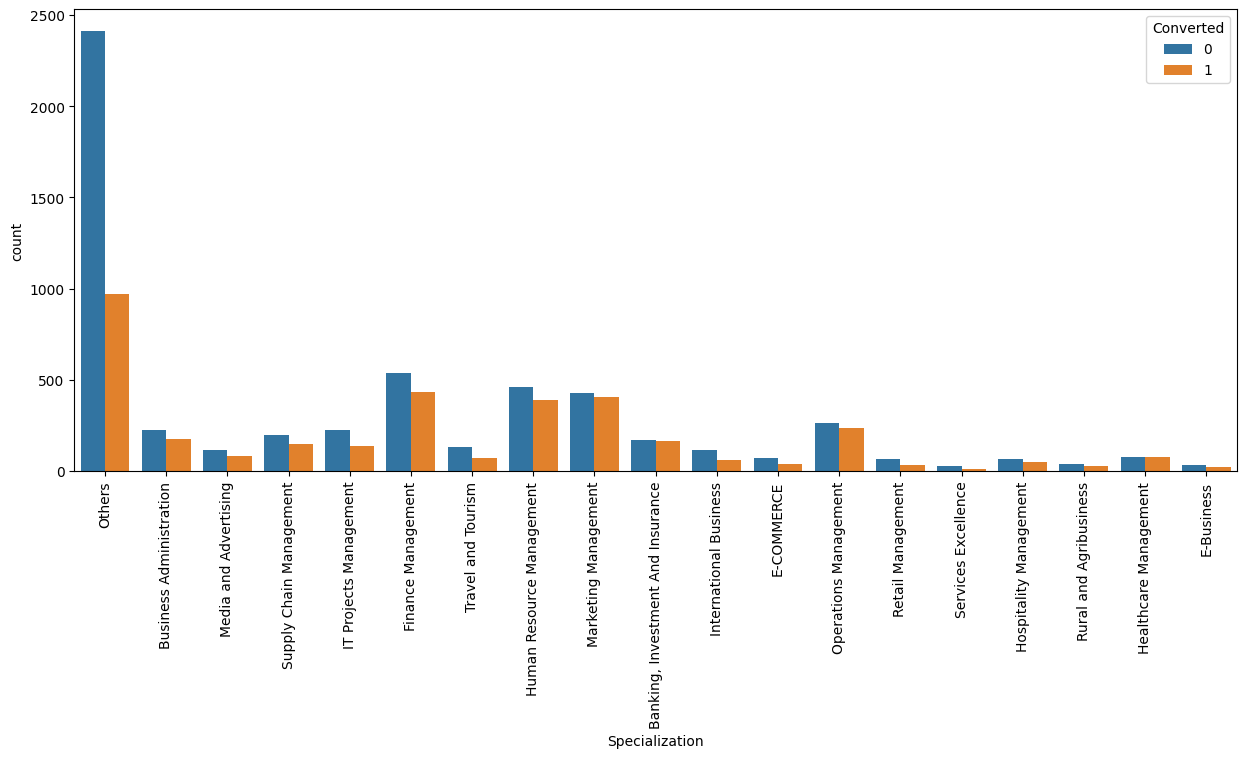

In [91]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
**Focus should be more on the Specialization with high conversion rate.**

### 11) What is your current occupation

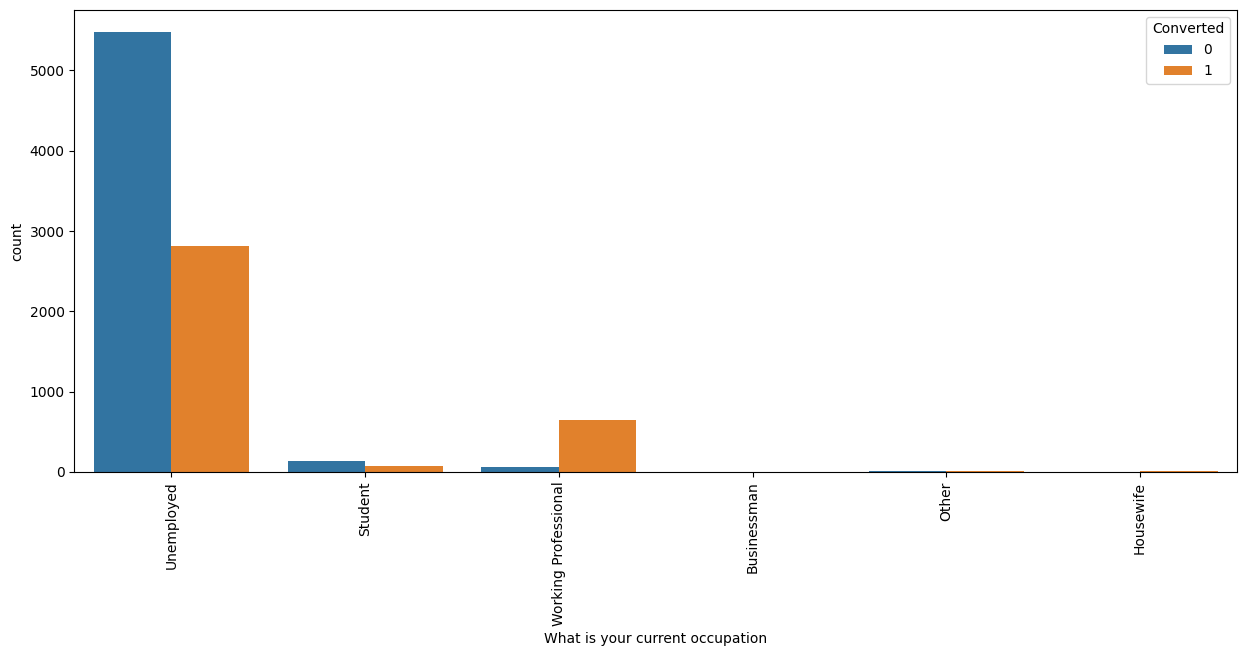

In [92]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### 12) Search

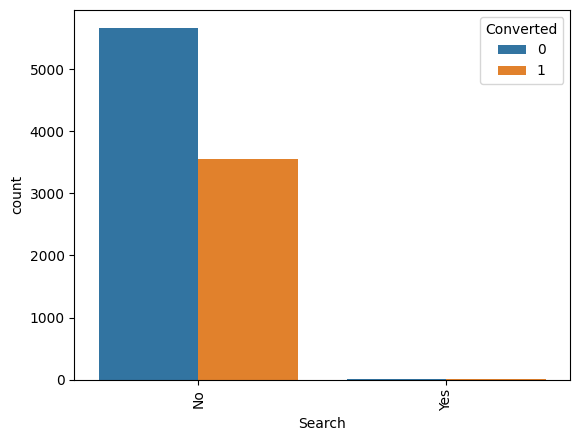

In [93]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 13) Newspaper Article

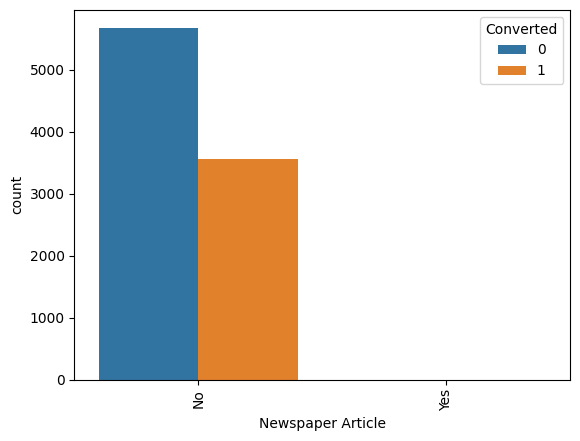

In [94]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 14) X Education Forums

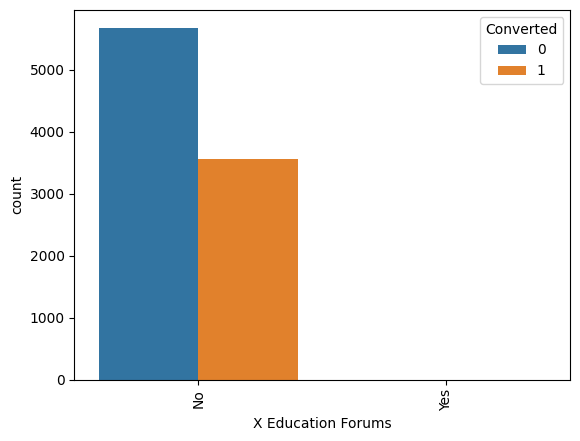

In [95]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 15) Newspaper

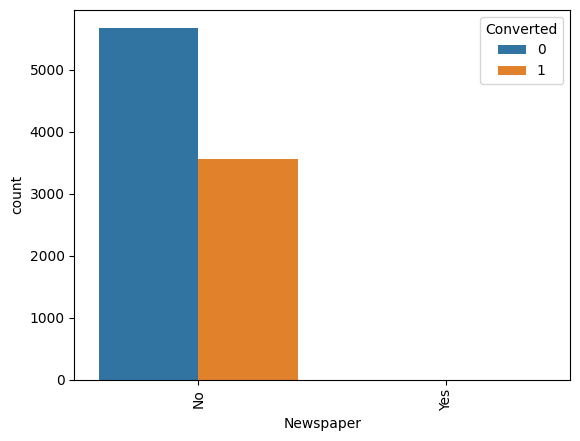

In [96]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 16) Digital Advertisement

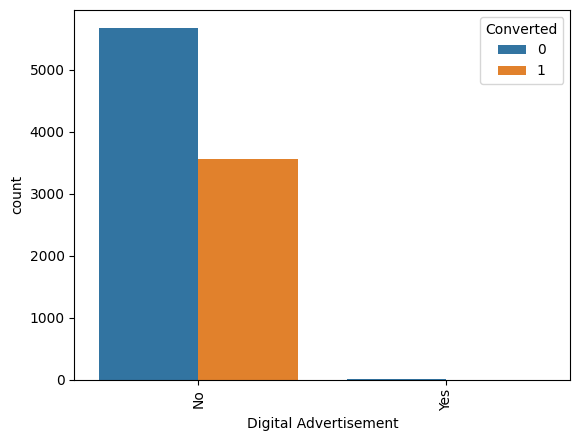

In [97]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 17) Through Recommendations

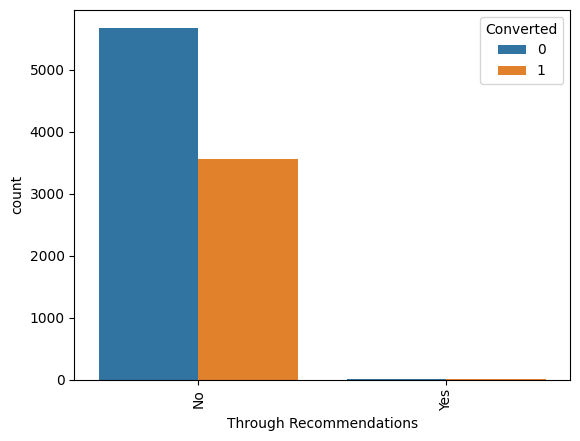

In [98]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 18) Tags

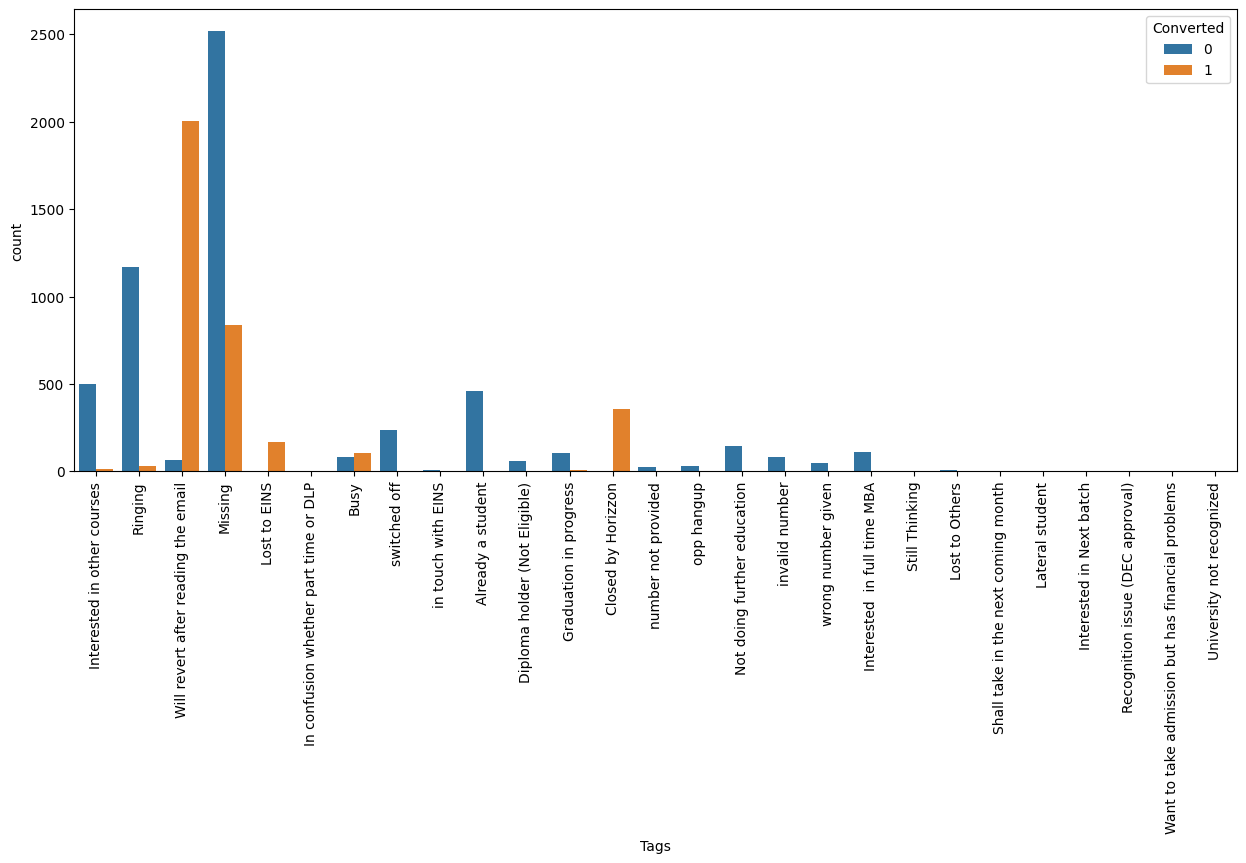

In [99]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.

### 19) City

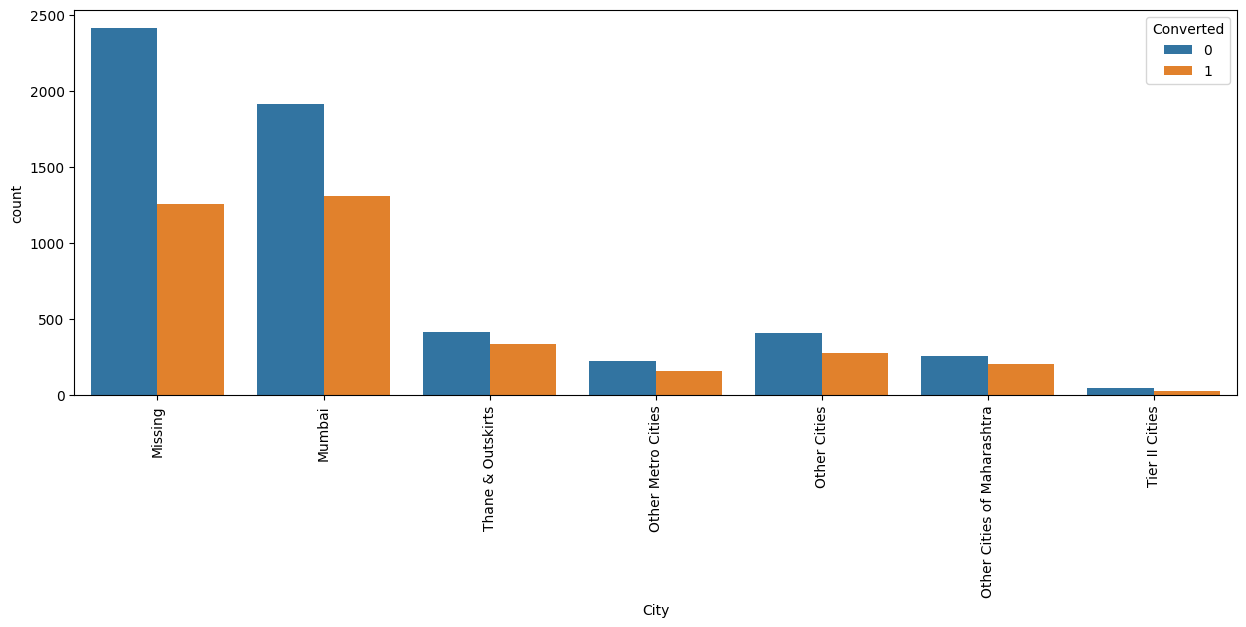

In [100]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
**Most leads are from mumbai with around 50% conversion rate.**

### 20) A free copy of Mastering The Interview

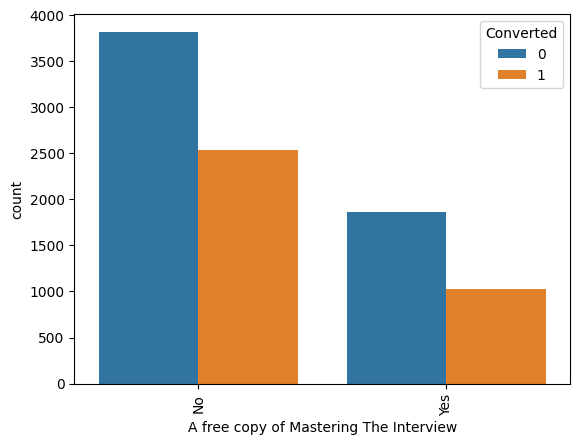

In [101]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead_data)
plt.xticks(rotation = 90)
plt.show()

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.
Less leads getting converted.

## Results
**Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis**

In [102]:
lead_data = lead_data.drop(['Tags','Search','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations',
                            'A free copy of Mastering The Interview'],axis=1)

In [103]:
lead_data.shape

(9240, 12)

In [104]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Do Not Call                      9240 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9240 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9240 non-null   float64
 8   Last Activity                    9240 non-null   object 
 9   Specialization                   9240 non-null   object 
 10  What is your current occupation  9240 non-null   object 
 11  City                             9240 non-null   object 
dtypes: float64(2), int64

## STEP 4: Data Preparation

### 1) Converting binary variables (Yes/No) to 1/0

In [105]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Missing
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Missing
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai


In [106]:
lead_data[['Do Not Email','Do Not Call']]=lead_data[['Do Not Email','Do Not Call']].replace({'Yes':1,'No':0})

In [107]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Missing
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Missing
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai


### 2) Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City'

In [108]:
dummy_data=pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City']],drop_first=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Missing
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Missing
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai


In [109]:
lead_data.shape

(9240, 12)

In [110]:
dummy_data.shape

(9240, 51)

In [111]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Missing,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Missing,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


In [112]:
lead_data.shape

(9240, 63)

Dropping the columns for which dummies were created

In [113]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City'], axis = 1)

In [114]:
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,0,5.0,674,2.5,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,0,0,1,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,0,0,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,0,0,1,2.0,1428,1.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


In [115]:
lead_data.shape

(9240, 57)

### 3) Splitting the data into  train and test set.

In [116]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [117]:
# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,5.0,674,2.5,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,0,0,2.0,1532,2.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,0,0,1.0,305,1.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,0,0,2.0,1428,1.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


In [118]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4)  Scaling the features

In [119]:
# from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [120]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
1871,0,0,-1.121955,-0.885371,-1.062143,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6795,0,0,0.313260,0.005716,-0.452487,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3516,0,0,0.672063,-0.691418,0.083827,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
8105,0,0,0.672063,1.365219,1.229797,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False
3934,0,0,-1.121955,-0.885371,-1.062143,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


#### STEP 5: MODEL BUILDING

#### STEP 5.1 : Feature Selection Using RFE

In [121]:
# from sklearn.model_selection import LogisticRegression
logreg= LogisticRegression()

# from sklearn.feature_selection import RFE
rfe=RFE(estimator=logreg,n_features_to_select=20) # Using RFE to get top 20 Variables
rfe=rfe.fit(X_train,y_train)

In [122]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [123]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 8),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', False, 12),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 18),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False,

In [124]:
cols=X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [125]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')

### Creating the models with StatsModels

### Model 1

In [126]:
import statsmodels.api as sm

In [127]:
# Convert columns to numeric data type  .Imp CODE TO remove type error
X_train[cols] = X_train[cols].astype(float)

# Drop rows with missing values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Ensure y_train aligns with X_train after dropping rows

# Check data types again
print(X_train.dtypes)

Do Not Email                                            float64
Do Not Call                                               int64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                     float64
Lead Origin_Lead Add Form                               float64
Lead Origin_Lead Import                                    bool
Lead Origin_Quick Add Form                                 bool
Lead Source_Facebook                                    float64
Lead Source_Google                                         bool
Lead Source_Olark Chat                                  float64
Lead Source_Organic Search                                 bool
Lead Source_Others                                         bool
Lead Source_Reference                                      bool
Lead Source_Referral Sites              

In [128]:
X_train_sm=sm.add_constant(X_train[cols])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.9
Date:                Mon, 19 Feb 2024   Deviance:                       5365.8
Time:                        11:50:25   Pearson chi2:                 9.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3933
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7413      1.181     -0.628      0.530      -3.055       1.573
Do Not Email                                            -1.2039      0.180     -6.705      0.000      -1.556      -0.852
Total Time Spent on Website                              1.0635      0.039     27.067      0.000       0.987       1.141
Lead Origin_Landing Page Submission                     -1.1477      0.128     -8.962      0.000      -1.399      -0.897
Lead Origin_Lead Add Form                                2.9988      0.204     14.723      0.000       2.600       3.398
Lead Source_Facebook                                    -0.6202      0.528     -1.174      0.240      -1.655       0.415
Lead Source_Olark Chat                                   0.9970      0.121      8.214      0.000       0.759       1.235
Lead Source_Welingak Website                             2.5974      0.751      3.460      0.001       1.126       4.069
Last Activity_Email Opened                               0.7551      0.109      6.941      0.000       0.542       0.968
Last Activity_Olark Chat Conversation                   -0.6994      0.189     -3.695      0.000      -1.070      -0.328
Last Activity_Other_Activity                             2.3321      0.478      4.884      0.000       1.396       3.268
Last Activity_SMS Sent                                   1.9264      0.110     17.462      0.000       1.710       2.143
Last Activity_Unreachable                                0.9214      0.362      2.544      0.011       0.211       1.631
Last Activity_Unsubscribed                               1.3565      0.484      2.802      0.005       0.408       2.306
Specialization_Hospitality Management                   -1.0472      0.324     -3.231      0.001      -1.683      -0.412
Specialization_Others                                   -1.1831      0.122     -9.683      0.000      -1.423      -0.944
What is your current occupation_Housewife               22.7578   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
What is your current occupation_Other                   -0.1470      1.428     -0.103      0.918      -2.945       2.651
What is your current occupation_Student                  0.2422      1.202      0.202      0.840      -2.113       2.597
What is your current occupation_Unemployed              -0.2105      1.178     -0.179      0.858      -2.519       2.098
What is your current occupation_Working Professional     2.4416      1.192      2.048      0.041       0.105       4.778
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [129]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

#### MODEL 2

In [130]:
X_train_sm=sm.add_constant(X_train[col1])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.1
Date:                Mon, 19 Feb 2024   Deviance:                       5372.1
Time:                        11:50:25   Pearson chi2:                 9.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1394      0.775      1.471      0.141      -0.379       2.658
Do Not Email                                            -1.2027      0.180     -6.700      0.000      -1.555      -0.851
Total Time Spent on Website                              1.0629      0.039     27.057      0.000       0.986       1.140
Lead Origin_Landing Page Submission                     -1.1372      0.128     -8.905      0.000      -1.388      -0.887
Lead Origin_Lead Add Form                                3.0023      0.204     14.744      0.000       2.603       3.401
Lead Source_Facebook                                    -0.6178      0.528     -1.170      0.242      -1.653       0.417
Lead Source_Olark Chat                                   0.9977      0.121      8.220      0.000       0.760       1.236
Lead Source_Welingak Website                             2.5952      0.751      3.457      0.001       1.124       4.067
Last Activity_Email Opened                               0.7598      0.109      6.994      0.000       0.547       0.973
Last Activity_Olark Chat Conversation                   -0.7056      0.190     -3.723      0.000      -1.077      -0.334
Last Activity_Other_Activity                             2.3339      0.477      4.889      0.000       1.398       3.270
Last Activity_SMS Sent                                   1.9278      0.110     17.488      0.000       1.712       2.144
Last Activity_Unreachable                                0.8984      0.366      2.456      0.014       0.182       1.615
Last Activity_Unsubscribed                               1.3577      0.484      2.805      0.005       0.409       2.306
Specialization_Hospitality Management                   -1.0470      0.324     -3.231      0.001      -1.682      -0.412
Specialization_Others                                   -1.1771      0.122     -9.657      0.000      -1.416      -0.938
What is your current occupation_Other                   -2.0362      1.113     -1.829      0.067      -4.218       0.146
What is your current occupation_Student                 -1.6494      0.802     -2.056      0.040      -3.222      -0.077
What is your current occupation_Unemployed              -2.1014      0.767     -2.738      0.006      -3.606      -0.597
What is your current occupation_Working Professional     0.5502      0.788      0.698      0.485      -0.994       2.095
========================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Working ProfessionaL' is very high, we can drop this column.

In [131]:
# Dropping the column
col1 = col1.drop('What is your current occupation_Working Professional')

#### MODEL 3

In [132]:
X_train_sm=sm.add_constant(X_train[col1])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2686.3
Date:                Mon, 19 Feb 2024   Deviance:                       5372.6
Time:                        11:50:25   Pearson chi2:                 9.14e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6599      0.223      7.438      0.000       1.222       2.097
Do Not Email                                  -1.2013      0.179     -6.694      0.000      -1.553      -0.850
Total Time Spent on Website                    1.0631      0.039     27.061      0.000       0.986       1.140
Lead Origin_Landing Page Submission           -1.1370      0.128     -8.905      0.000      -1.387      -0.887
Lead Origin_Lead Add Form                      3.0019      0.204     14.742      0.000       2.603       3.401
Lead Source_Facebook                          -0.6163      0.528     -1.168      0.243      -1.651       0.418
Lead Source_Olark Chat                         0.9981      0.121      8.223      0.000       0.760       1.236
Lead Source_Welingak Website                   2.5959      0.751      3.458      0.001       1.124       4.067
Last Activity_Email Opened                     0.7615      0.109      7.011      0.000       0.549       0.974
Last Activity_Olark Chat Conversation         -0.7059      0.190     -3.722      0.000      -1.078      -0.334
Last Activity_Other_Activity                   2.3375      0.477      4.898      0.000       1.402       3.273
Last Activity_SMS Sent                         1.9300      0.110     17.514      0.000       1.714       2.146
Last Activity_Unreachable                      0.8985      0.366      2.454      0.014       0.181       1.616
Last Activity_Unsubscribed                     1.3595      0.484      2.810      0.005       0.411       2.308
Specialization_Hospitality Management         -1.0449      0.324     -3.227      0.001      -1.679      -0.410
Specialization_Others                         -1.1772      0.122     -9.660      0.000      -1.416      -0.938
What is your current occupation_Other         -2.5581      0.828     -3.088      0.002      -4.182      -0.935
What is your current occupation_Student       -2.1716      0.299     -7.263      0.000      -2.758      -1.586
What is your current occupation_Unemployed    -2.6237      0.185    -14.185      0.000      -2.986      -2.261
==============================================================================================================
"""

Since Pvalue of 'Lead Source_Facebook' is very high, we can drop this column.

In [133]:
# Dropping the column 
col1 = col1.drop('Lead Source_Facebook')

#### MODEL 4

In [134]:
X_train_sm=sm.add_constant(X_train[col1])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.0
Date:                Mon, 19 Feb 2024   Deviance:                       5374.1
Time:                        11:50:26   Pearson chi2:                 9.15e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3926
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6448      0.223      7.383      0.000       1.208       2.081
Do Not Email                                  -1.2013      0.179     -6.694      0.000      -1.553      -0.850
Total Time Spent on Website                    1.0654      0.039     27.145      0.000       0.989       1.142
Lead Origin_Landing Page Submission           -1.1210      0.127     -8.841      0.000      -1.370      -0.873
Lead Origin_Lead Add Form                      3.0197      0.203     14.867      0.000       2.622       3.418
Lead Source_Olark Chat                         1.0147      0.121      8.408      0.000       0.778       1.251
Lead Source_Welingak Website                   2.5943      0.751      3.456      0.001       1.123       4.066
Last Activity_Email Opened                     0.7567      0.109      6.969      0.000       0.544       0.969
Last Activity_Olark Chat Conversation         -0.7059      0.190     -3.722      0.000      -1.078      -0.334
Last Activity_Other_Activity                   2.3382      0.477      4.898      0.000       1.403       3.274
Last Activity_SMS Sent                         1.9269      0.110     17.488      0.000       1.711       2.143
Last Activity_Unreachable                      0.8988      0.366      2.454      0.014       0.181       1.617
Last Activity_Unsubscribed                     1.3594      0.484      2.809      0.005       0.411       2.308
Specialization_Hospitality Management         -1.0544      0.323     -3.265      0.001      -1.687      -0.421
Specialization_Others                         -1.1747      0.122     -9.658      0.000      -1.413      -0.936
What is your current occupation_Other         -2.5543      0.828     -3.085      0.002      -4.177      -0.932
What is your current occupation_Student       -2.1732      0.299     -7.274      0.000      -2.759      -1.588
What is your current occupation_Unemployed    -2.6223      0.185    -14.181      0.000      -2.985      -2.260
==============================================================================================================
"""

### Checking for VIF values:

In [135]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,What is your current occupation_Unemployed,8.90
2,Lead Origin_Landing Page Submission,5.34
13,Specialization_Others,4.06
6,Last Activity_Email Opened,2.82
9,Last Activity_SMS Sent,2.36
4,Lead Source_Olark Chat,2.20
7,Last Activity_Olark Chat Conversation,1.81
3,Lead Origin_Lead Add Form,1.59
0,Do Not Email,1.29
5,Lead Source_Welingak Website,1.25


In [136]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

### Model 5

In [137]:
X_train_sm=sm.add_constant(X_train[col1])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.3
Date:                Mon, 19 Feb 2024   Deviance:                       5668.7
Time:                        11:50:26   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5801      0.140     -4.148      0.000      -0.854      -0.306
Do Not Email                               -1.2752      0.174     -7.322      0.000      -1.617      -0.934
Total Time Spent on Website                 1.0827      0.038     28.183      0.000       1.007       1.158
Lead Origin_Landing Page Submission        -1.2842      0.122    -10.499      0.000      -1.524      -1.044
Lead Origin_Lead Add Form                   3.1219      0.199     15.681      0.000       2.732       3.512
Lead Source_Olark Chat                      1.0360      0.119      8.731      0.000       0.803       1.269
Lead Source_Welingak Website                2.4897      0.751      3.317      0.001       1.019       3.961
Last Activity_Email Opened                  0.7130      0.104      6.857      0.000       0.509       0.917
Last Activity_Olark Chat Conversation      -0.7282      0.183     -3.969      0.000      -1.088      -0.369
Last Activity_Other_Activity                2.4960      0.466      5.362      0.000       1.584       3.408
Last Activity_SMS Sent                      1.8839      0.106     17.843      0.000       1.677       2.091
Last Activity_Unreachable                   0.8061      0.355      2.272      0.023       0.111       1.502
Last Activity_Unsubscribed                  1.4103      0.465      3.032      0.002       0.499       2.322
Specialization_Hospitality Management      -0.9619      0.305     -3.155      0.002      -1.559      -0.364
Specialization_Others                      -1.5147      0.118    -12.806      0.000      -1.747      -1.283
What is your current occupation_Other      -0.1823      0.817     -0.223      0.823      -1.784       1.419
What is your current occupation_Student     0.2983      0.245      1.219      0.223      -0.181       0.778
===========================================================================================================
"""

In [138]:
# Dropping the column  'What is your current occupation_Other' because it has high Pvalue
col1 = col1.drop('What is your current occupation_Other')

#### MODEL 6

In [139]:
X_train_sm=sm.add_constant(X_train[col1])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.4
Date:                Mon, 19 Feb 2024   Deviance:                       5668.7
Time:                        11:50:26   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5812      0.140     -4.157      0.000      -0.855      -0.307
Do Not Email                               -1.2760      0.174     -7.328      0.000      -1.617      -0.935
Total Time Spent on Website                 1.0825      0.038     28.190      0.000       1.007       1.158
Lead Origin_Landing Page Submission        -1.2838      0.122    -10.497      0.000      -1.523      -1.044
Lead Origin_Lead Add Form                   3.1222      0.199     15.682      0.000       2.732       3.512
Lead Source_Olark Chat                      1.0362      0.119      8.733      0.000       0.804       1.269
Lead Source_Welingak Website                2.4895      0.751      3.317      0.001       1.018       3.961
Last Activity_Email Opened                  0.7132      0.104      6.859      0.000       0.509       0.917
Last Activity_Olark Chat Conversation      -0.7289      0.183     -3.973      0.000      -1.088      -0.369
Last Activity_Other_Activity                2.4965      0.465      5.363      0.000       1.584       3.409
Last Activity_SMS Sent                      1.8844      0.106     17.853      0.000       1.678       2.091
Last Activity_Unreachable                   0.8067      0.355      2.274      0.023       0.111       1.502
Last Activity_Unsubscribed                  1.4116      0.465      3.035      0.002       0.500       2.323
Specialization_Hospitality Management      -0.9613      0.305     -3.153      0.002      -1.559      -0.364
Specialization_Others                      -1.5141      0.118    -12.804      0.000      -1.746      -1.282
What is your current occupation_Student     0.2986      0.245      1.220      0.222      -0.181       0.778
===========================================================================================================
"""

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.82
13,Specialization_Others,2.53
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.22
4,Lead Source_Olark Chat,2.15
7,Last Activity_Olark Chat Conversation,1.75
3,Lead Origin_Lead Add Form,1.54
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.25
1,Total Time Spent on Website,1.24


In [141]:
# Dropping the column  'What is your current occupation_Student' because it has high Pvalue
col1 = col1.drop('What is your current occupation_Student')

#### MODEL 7

In [142]:
X_train_sm=sm.add_constant(X_train[col1])
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
result=logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.1
Date:                Mon, 19 Feb 2024   Deviance:                       5670.2
Time:                        11:50:27   Pearson chi2:                 6.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3641
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5788      0.140     -4.141      0.000      -0.853      -0.305
Do Not Email                             -1.2758      0.174     -7.324      0.000      -1.617      -0.934
Total Time Spent on Website               1.0822      0.038     28.187      0.000       1.007       1.157
Lead Origin_Landing Page Submission      -1.2812      0.122    -10.474      0.000      -1.521      -1.041
Lead Origin_Lead Add Form                 3.1261      0.199     15.707      0.000       2.736       3.516
Lead Source_Olark Chat                    1.0403      0.119      8.771      0.000       0.808       1.273
Lead Source_Welingak Website              2.4816      0.751      3.306      0.001       1.011       3.953
Last Activity_Email Opened                0.7158      0.104      6.886      0.000       0.512       0.919
Last Activity_Olark Chat Conversation    -0.7270      0.183     -3.962      0.000      -1.087      -0.367
Last Activity_Other_Activity              2.4915      0.465      5.353      0.000       1.579       3.404
Last Activity_SMS Sent                    1.8821      0.106     17.837      0.000       1.675       2.089
Last Activity_Unreachable                 0.8020      0.355      2.261      0.024       0.107       1.497
Last Activity_Unsubscribed                1.4077      0.465      3.025      0.002       0.496       2.320
Specialization_Hospitality Management    -0.9577      0.305     -3.142      0.002      -1.555      -0.360
Specialization_Others                    -1.5128      0.118    -12.785      0.000      -1.745      -1.281
=========================================================================================================
"""

In [143]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
13,Specialization_Others,2.53
6,Last Activity_Email Opened,2.51
9,Last Activity_SMS Sent,2.22
4,Lead Source_Olark Chat,2.15
7,Last Activity_Olark Chat Conversation,1.75
3,Lead Origin_Lead Add Form,1.54
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.25
1,Total Time Spent on Website,1.24


In [144]:
lead_data[col1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Do Not Email                           9240 non-null   int64
 1   Total Time Spent on Website            9240 non-null   int64
 2   Lead Origin_Landing Page Submission    9240 non-null   bool 
 3   Lead Origin_Lead Add Form              9240 non-null   bool 
 4   Lead Source_Olark Chat                 9240 non-null   bool 
 5   Lead Source_Welingak Website           9240 non-null   bool 
 6   Last Activity_Email Opened             9240 non-null   bool 
 7   Last Activity_Olark Chat Conversation  9240 non-null   bool 
 8   Last Activity_Other_Activity           9240 non-null   bool 
 9   Last Activity_SMS Sent                 9240 non-null   bool 
 10  Last Activity_Unreachable              9240 non-null   bool 
 11  Last Activity_Unsubscribed    

## As the Pvalues of all variables is 0 and VIF values are low for all the variables, MODEL 7 is our final model.
### We have 14 variables in our final model.

### Making Prediction on the Train set

In [145]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1871    0.554565
6795    0.065939
3516    0.252799
8105    0.817504
3934    0.215239
4844    0.884742
3297    0.126302
8071    0.991472
987     0.192180
7423    0.872954
dtype: float64

In [146]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.55456538, 0.06593891, 0.25279924, 0.81750449, 0.21523865,
       0.88474239, 0.1263019 , 0.99147232, 0.19218044, 0.87295403])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [147]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.554565,1871
1,0,0.065939,6795
2,0,0.252799,3516
3,0,0.817504,8105
4,0,0.215239,3934


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels 

Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [148]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.554565,1871,1
1,0,0.065939,6795,0
2,0,0.252799,3516,0
3,0,0.817504,8105,1
4,0,0.215239,3934,0


### Making the Confusion matrix

In [149]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3541  461]
 [ 845 1621]]


In [150]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3541      461
# converted            845       1621  

In [151]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7980828695114409


### Metrics OTHER THAN accuracy

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6573398215733982


In [154]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8848075962018991


In [155]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted ( 1- Specificity)
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11519240379810095


In [156]:
# positive predictive value ( Precision - 0)
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7785782901056676


In [157]:
# Negative predictive value ( Precision -1)
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8073415412676699


We found out that our specificity was good (~88%) but our sensitivity was only 65%.Hence, this needed to be taken care of.
We have got sensitivity of 65% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen.
Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

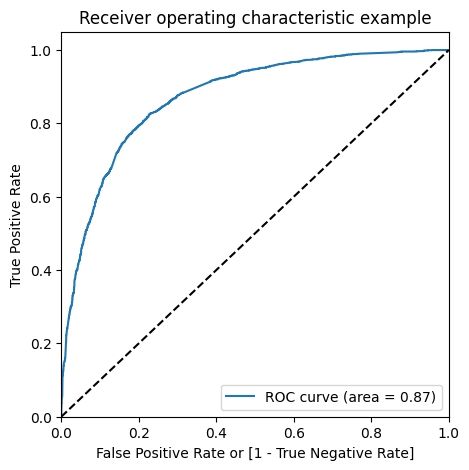

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.87) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [161]:
# Let's create columns with different probability cutoffs ( Predicted columns is = cut off 0.5)
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.554565,1871,1,1,1,1,1,1,1,0,0,0,0
1,0,0.065939,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.252799,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.817504,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.215239,3934,0,1,1,1,0,0,0,0,0,0,0


In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','senstivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    senstivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,senstivity,specificity]
print(cutoff_df)

     prob  accuracy  senstivity  specificity
0.0   0.0  0.381262    1.000000     0.000000
0.1   0.1  0.579623    0.976886     0.334833
0.2   0.2  0.721088    0.920114     0.598451
0.3   0.3  0.780303    0.842255     0.742129
0.4   0.4  0.802412    0.770884     0.821839
0.5   0.5  0.798083    0.657340     0.884808
0.6   0.6  0.784632    0.574209     0.914293
0.7   0.7  0.765925    0.478913     0.942779
0.8   0.8  0.733766    0.356853     0.966017
0.9   0.9  0.689858    0.206813     0.987506


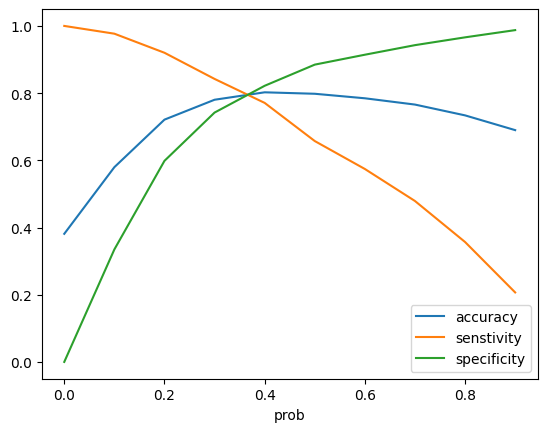

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','senstivity','specificity'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.554565,1871,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.065939,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.252799,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.817504,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.215239,3934,0,1,1,1,0,0,0,0,0,0,0,0


## Assigning Lead Score to the Training data


In [165]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.554565,1871,1,1,1,1,1,1,1,0,0,0,0,1,55
1,0,0.065939,6795,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.252799,3516,0,1,1,1,0,0,0,0,0,0,0,0,25
3,0,0.817504,8105,1,1,1,1,1,1,1,1,1,1,0,1,82
4,0,0.215239,3934,0,1,1,1,0,0,0,0,0,0,0,0,22


## Model Evaluation 

In [166]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7931354359925789


In [167]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3115,  887],
       [ 451, 2015]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8171127331711273


In [170]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7783608195902049


In [171]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2216391804097951


In [172]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6943487250172296


In [173]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8735277621985418


## Making predictions on the test set

### Scaling the test data

In [174]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others'],
      dtype='object')

In [175]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [176]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]


In [177]:
# Convert columns to numeric data type  .Imp CODE TO remove type error
X_test[col1] = X_test[col1].astype(float)

# Drop rows with missing values
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]  # Ensure y_train aligns with X_train after dropping rows

# Check data types again
print(X_test.dtypes)

Do Not Email                             float64
Total Time Spent on Website              float64
Lead Origin_Landing Page Submission      float64
Lead Origin_Lead Add Form                float64
Lead Source_Olark Chat                   float64
Lead Source_Welingak Website             float64
Last Activity_Email Opened               float64
Last Activity_Olark Chat Conversation    float64
Last Activity_Other_Activity             float64
Last Activity_SMS Sent                   float64
Last Activity_Unreachable                float64
Last Activity_Unsubscribed               float64
Specialization_Hospitality Management    float64
Specialization_Others                    float64
dtype: object


In [178]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = result.predict(X_test_sm) # Indexes of X_test_sm also get transferred to y_test_pred
y_test_pred[:10]

4269    0.697264
2376    0.876364
7766    0.350204
9199    0.060862
4359    0.909279
9186    0.568518
1631    0.475894
8963    0.141453
8007    0.105556
5324    0.349961
dtype: float64

In [179]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [180]:
# Let's see the head
y_pred_1.head()

,0
4269,0.697264
2376,0.876364
7766,0.350204
9199,0.060862
4359,0.909279


In [202]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [203]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [184]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [185]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [186]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.697264
1,1,2376,0.876364
2,1,7766,0.350204
3,0,9199,0.060862
4,1,4359,0.909279


In [187]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [188]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [189]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,4269,1,0.697264
1,2376,1,0.876364
2,7766,1,0.350204
3,9199,0,0.060862
4,4359,1,0.909279


In [190]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [191]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,4269,1,0.697264,1
1,2376,1,0.876364,1
2,7766,1,0.350204,1
3,9199,0,0.060862,0
4,4359,1,0.909279,1


In [192]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7904040404040404


In [193]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1311,  366],
       [ 215,  880]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8036529680365296


In [196]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7817531305903399


### Assigning Lead Score to the Testing data

In [197]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,4269,1,0.697264,1,70
1,2376,1,0.876364,1,88
2,7766,1,0.350204,1,35
3,9199,0,0.060862,0,6
4,4359,1,0.909279,1,91


## CONCLUSIONS:
After running the model on the Test Data , we got:

* **Accuracy : 79.04 %**
* **Sensitivity : 80.3 %**
* **Specificity : 78.2 %**

## Results :

### 1) Comparing the values obtained for Train & Test:

#### Train Data: 

* **Accuracy : 79.3 %**
* **Sensitivity : 81.7 %**
* **Specificity : 77.8 %**

#### Test Data: 

* **Accuracy : 79.04 %**
* **Sensitivity : 80.4 %**
* **Specificity : 78.2 %**

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% .
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this
model to get a higher lead conversion rate of 80%.

### 2) Finding out the leads which should be contacted:
#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [198]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,2376,1,0.876364,1,88
4,4359,1,0.909279,1,91
13,2907,1,0.907015,1,91
15,493,1,0.909279,1,91
26,5440,0,0.885748,1,89


In [199]:
hot_leads.shape

(339, 5)

So there are 339 leads which can be contacted and have a high chance of getting converted.  The Prospect ID of the customers to be contacted are :

In [200]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([2376, 4359, 2907,  493, 5440, 8429, 1200, 7909, 5638, 7631, 7250,
       6666, 5448, 1287, 8103, 3444, 2392, 5363, 7065, 8499, 4830, 1365,
       6687, 5793, 6066, 8099, 8120, 2844, 7396,   88, 7683, 6860, 4058,
       5042, 2243, 5896,  269, 2115, 8113, 4645, 2481, 7978, 3518, 1965,
       2946, 4902, 5818, 2804, 7157,  446, 2629, 3725, 4786, 5825, 8055,
       4403, 2926, 2524, 1867, 5697, 6725, 6156, 2653, 3478, 5687, 3751,
       5832, 3190,   77, 4982, 9026, 6243, 4038, 7187, 5812, 4646,  841,
       7033, 3188, 8556, 5266, 7818,   12, 1675, 9074, 3321, 7053, 4212,
       6632, 7877, 1950, 7222, 5586, 7482, 6383, 1425,  650, 3172, 2158,
       3919, 5784, 3455, 5942, 6046, 4612, 2670, 9087, 3456, 2688, 5263,
       4613, 1928, 8098, 2662, 2337, 6127,  507, 2631, 2285, 8412, 3339,
       8054, 8082, 3113, 1882, 7756, 8087, 3488, 5575, 8888, 6170, 2764,
       6760, 2744, 2124, 7963, 5671, 8110, 4213, 4803, 5571, 8641,  918,
       8451,  818, 6987, 7433, 1283,  220, 2122, 86

### 3) Finding out the Important Features  from our final model:

In [201]:
result.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                3.126053
Last Activity_Other_Activity             2.491541
Lead Source_Welingak Website             2.481608
Last Activity_SMS Sent                   1.882099
Last Activity_Unsubscribed               1.407668
Total Time Spent on Website              1.082189
Lead Source_Olark Chat                   1.040320
Last Activity_Unreachable                0.801973
Last Activity_Email Opened               0.715760
const                                   -0.578807
Last Activity_Olark Chat Conversation   -0.726957
Specialization_Hospitality Management   -0.957735
Do Not Email                            -1.275842
Lead Origin_Landing Page Submission     -1.281186
Specialization_Others                   -1.512766
dtype: float64

## Recommendations:

* The company **should make calls** to the leads ('Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others')

----------------------------------------------------------------------END-------------------------------------------------------------------